Using linear regression



We will start by using scikit-learn to perform regression. (In fact we will use it to both create and solve a linear regression problem.)


In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

Mean squared error: 1.94
Variance score: 1.00


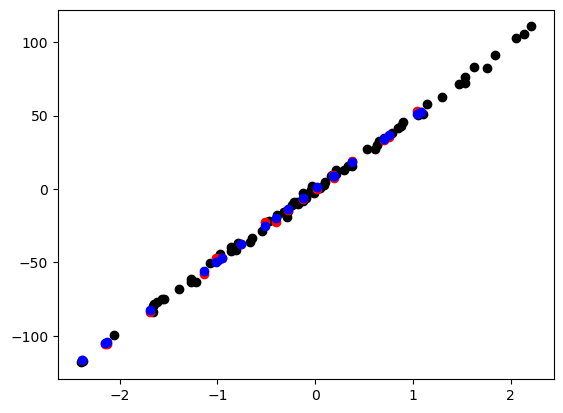

In [7]:
# of features (how many dimensions the problem has), and the amount of noise.
X, y = make_regression(n_samples=100, n_features=1, noise = 2)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

regr = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
regr.fit(X_train, y_train)      
       # Train the regression model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])
#
# Evaluate the model
#

# Data on how good the model is:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plotting training data, test data, and results.
plt.scatter(X_train, y_train, color="black")
plt.scatter(X_test, y_test, color="red")
plt.scatter(X_test, regr.predict(X_test), color="blue")

plt.show()

Mean squared error: 2.96
Variance score: 1.00


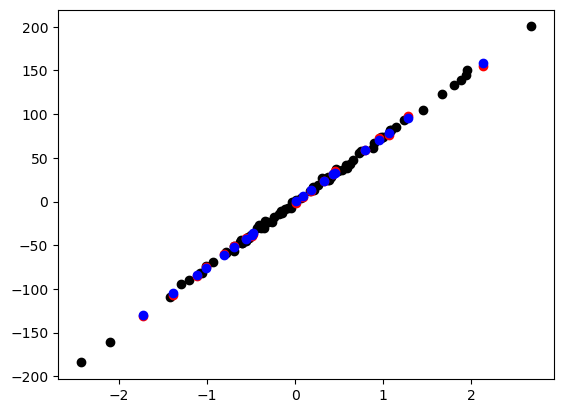

In [8]:

# Generate a regression problem:
#

# The main parameters of make-regression are the number of samples, the number
# of features (how many dimensions the problem has), and the amount of noise.
X, y = make_regression(n_samples=100, n_features=1, noise = 2)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

#
# Solve the problem using the built-in regresson model
#
regr = linear_model.LinearRegression() # A regression model object
regr.fit(X_train, y_train)             # Train the regression model

#
# Evaluate the model
#

# Data on how good the model is:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plotting training data, test data, and results.
plt.scatter(X_train, y_train, color="black")
plt.scatter(X_test, y_test, color="red")
plt.scatter(X_test, regr.predict(X_test), color="blue")

plt.show()



w0 = 0
alpha = 0.001
error = y(i) - p(i)
w = w0 + alpha * error(i) * x(i)
y = w0 + (w1 * x)

for i in range(m)
  
def error(x, y, w): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

[-0.11677394] [15.22764279]
1.4038270079665467


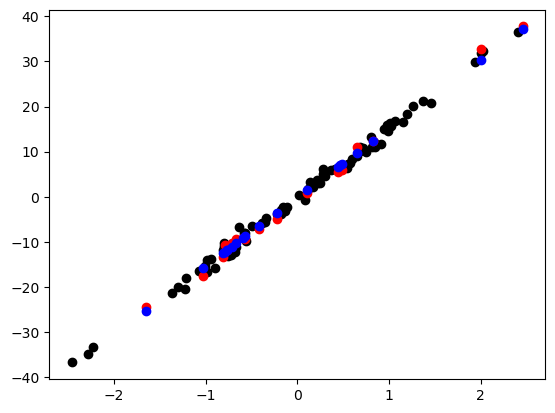

In [34]:
from time import sleep

# Let's assume some training data for X_train and y_train
# X_train is the feature set and y_train is the corresponding labels
# Create a range of X values for plotting


# For the sake of example, let's create some random linear-like data
X, y = make_regression(n_samples=100, n_features=1, noise = 1)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Simple Linear Regression Model

# Initialize weights w0 (intercept) and w1 (slope) with zeros or random values
w0 = 0
w1 = 0
m = X_train.shape[0]
# Learning rate
alpha = 0.001

# Number of iterations

def predict(x, w0, w1):
    y_pred = w0 + w1 * X_test
    return y_pred

errors = []
# Training the model

for iteration in range(m):
    for i in range(X_train.shape[0]):
        # Make a prediction
        pi = w0 + w1 * X_train[i]
        # Calculate the error
        error_i = (y_train[i] - pi)
        errors.append(error_i.item())
        # Update the weights
        w0 = w0 + alpha * error_i
        w1 = w1 + alpha * error_i * X_train[i]
        
# Print model parameters

print(w0, w1)
MSE = np.mean(error_i)** 2
print(MSE)

plt.scatter(X_train, y_train, color="black")
plt.scatter(X_test, y_test, color="red")
plt.scatter(X_test, predict(X_test, w0, w1), color="blue")

# Data on how good the model is:
#print("Mean squared error: %.2f"
 #     % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(X_test, y_test))

[5.21238836e+03 4.48885741e+01 1.03765796e+01 1.61625247e+00]
23292604.473873258


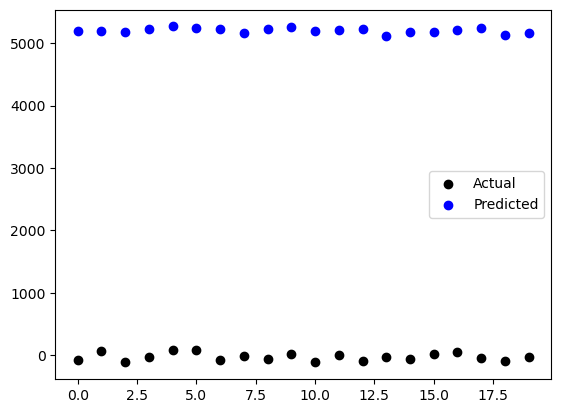

In [59]:
# Generate random linear-like data with 3 features
X, y = make_regression(n_samples=100, n_features=3, noise=3)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize weights with zeros. Now we need a weight for each feature plus the intercept.
w = np.zeros(X_train.shape[1] + 1)
m = X_train.shape[0]
# Learning rate
alpha = 0.001

def predict(X, w):
    # Add a column of ones to account for w0 (the intercept)
    X_with_intercept = np.c_[np.ones(X.shape[0]), X]
    return np.dot(X_with_intercept, w)

errors = []

# Training the model
for iteration in range(m):
    # Make a prediction for the whole training set
    predictions = predict(X_train, w)
    # Calculate the error for the whole training set
    errors_i = y_train - predictions
    errors.append(np.mean(errors_i**2))
    # Update the weights (gradient descent step)
    gradients = -2/m * np.dot(X_train.T, errors_i)
    w[1:] = w[1:] - alpha * gradients  # Update the weights for the features
    w[0] = w[0] - alpha * np.sum(errors_i)  # Update the intercept (bias)

# Print model parameters
print(w)

# Mean Squared Error
MSE = np.mean(errors_i**2)
print(MSE)

# Since we have multiple features, we cannot plot the original feature space directly.
# However, we can plot the predicted values against the actual values to see how well our model performs.
plt.scatter(range(len(y_test)), y_test, color="black", label="Actual")
plt.scatter(range(len(y_test)), predict(X_test, w), color="blue", label="Predicted")
plt.legend()
plt.show()